In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# Initial Setup

In [2]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/initial.csv')
sdf.params={'mass':0.001}
sdf

,x,y,vx,vy,u,h,rho
0,-0.50000,-0.50000,0,0,0.0,0.0625,1
1,-0.46875,-0.50000,0,0,0.0,0.0625,1
2,-0.43750,-0.50000,0,0,0.0,0.0625,1
3,-0.40625,-0.50000,0,0,0.0,0.0625,1
4,-0.37500,-0.50000,0,0,0.0,0.0625,1
...,...,...,...,...,...,...,...
1019,0.34375,0.46875,0,0,0.0,0.0625,1
1020,0.37500,0.46875,0,0,0.0,0.0625,1
1021,0.40625,0.46875,0,0,0.0,0.0625,1
1022,0.43750,0.46875,0,0,0.0,0.0625,1


<Axes: xlabel='x', ylabel='y'>

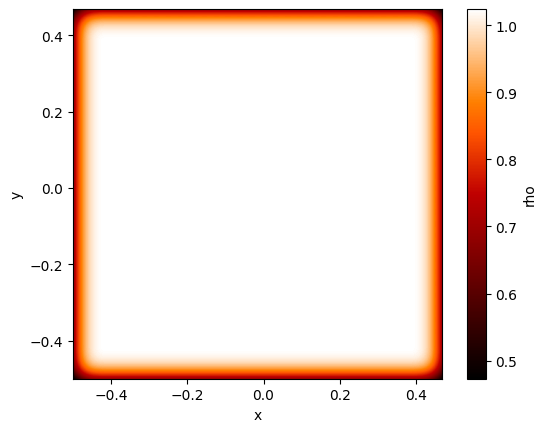

In [3]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [4]:
sdft = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdft.params={'mass':0.001}
sdft

,x,y,vx,vy,u,h,rho
0,-0.50000,-0.50000,-0.0,-0.0,0.0,0.053709,0.487491
1,-0.46875,-0.50000,-0.0,-0.0,0.0,0.043888,0.730089
2,-0.43750,-0.50000,-0.0,-0.0,0.0,0.043367,0.747742
3,-0.40625,-0.50000,-0.0,-0.0,0.0,0.043367,0.747742
4,-0.37500,-0.50000,-0.0,-0.0,0.0,0.043367,0.747742
...,...,...,...,...,...,...,...
1019,0.34375,0.46875,0.0,0.0,0.0,0.043367,0.747742
1020,0.37500,0.46875,0.0,0.0,0.0,0.043367,0.747742
1021,0.40625,0.46875,0.0,0.0,0.0,0.043367,0.747742
1022,0.43750,0.46875,0.0,0.0,0.0,0.043888,0.730089


<Axes: xlabel='x', ylabel='y'>

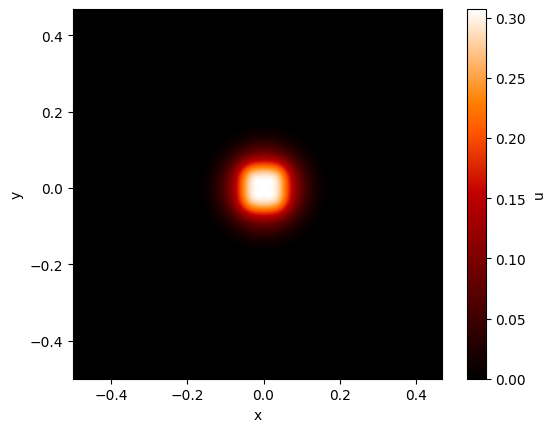

In [5]:
sdft1 = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdft1.params={'mass':0.001}
sdft1.render('u', xsec=1.0)

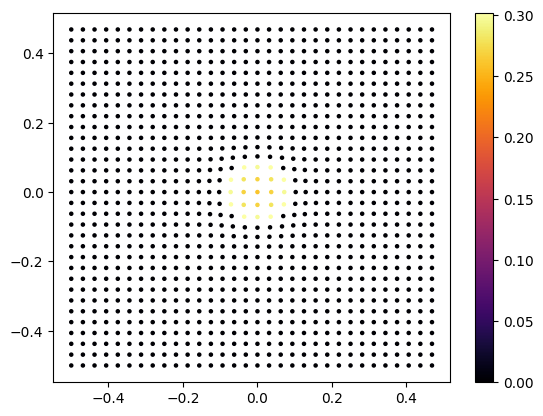

In [6]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['u'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.show()

# Angular Momentum's Conservation

In [7]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [8]:
T = 262
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

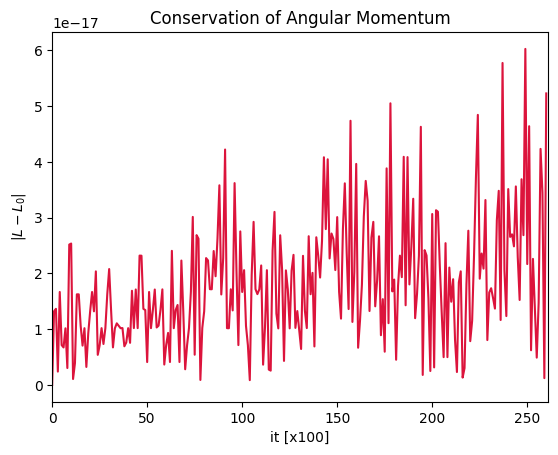

In [9]:
plt.plot(time[:-1], np.abs(ang_mom[:-1]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$|L-L_0|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [10]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [11]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

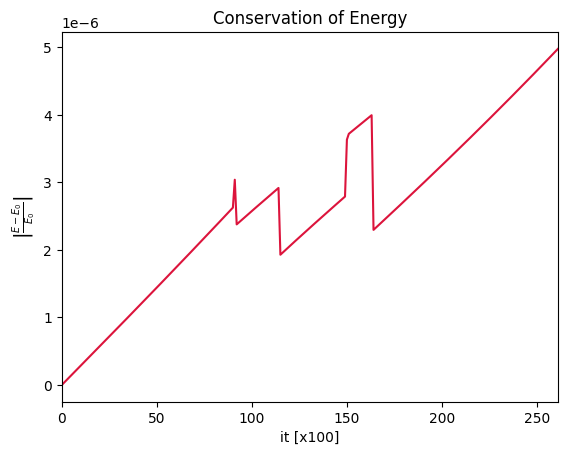

In [12]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [13]:
rad = []
rho = []
for ii in range(sdft.shape[0]):
    if ((sdft["x"][ii]>-0.44) and (sdft["x"][ii]<0.44)):
        if (sdft["y"][ii]>-0.44 and sdft["y"][ii]<0.44):
            rad.append(np.sqrt(sdft["x"][ii]**2 + sdft["y"][ii]**2))
            rho.append(sdft["rho"][ii])
len(rad)

841

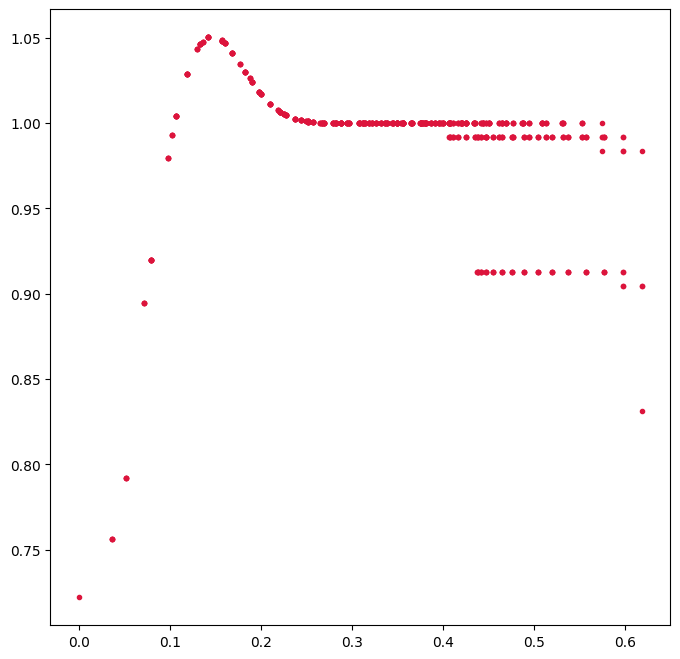

In [14]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, rho, ".", color="crimson")
#plt.ylim(0.95,1.02)
plt.show()